<a href="https://colab.research.google.com/github/susanavillar/MINERIA-DE-DATOS/blob/main/LAB_02_A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # LABORATORIO 2

> GRUPO A08

> Julia Hernández Quintas, Pablo Medieta Ruiz, Lucia Valdera Gayoso, Susana Villar Polvorosa

> ## **Práctica 1 (reglas de	Asociación)**




> #### **Preprocesamiento de datos:**


In [ ]:
# Montar Google Drive si el archivo está almacenado en Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta del archivo CSV
archivo_csv = '/content/drive/MyDrive/Market_Basket_Optimisation.csv'

# Leemos el archivo CSV línea por línea y guardar cada línea como una lista
compras = []
with open(archivo_csv, 'r') as archivo:
    for linea in archivo:
        # Dividir la línea en una lista de elementos
        elementos = linea.strip().split(',')
        compras.append(elementos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A continuación, vemos como hemos guardado cada una de las compras, que en este caso ha sido en forma de vectores, de diferentes tamaños, en función del número de elementos que se han comprado.
Mostramos las 10 primeras compras:

In [ ]:
for i in range(10):
    print(compras[i])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']
['low fat yogurt']
['whole wheat pasta', 'french fries']
['soup', 'light cream', 'shallot']
['frozen vegetables', 'spaghetti', 'green tea']
['french fries']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('El número de registros es:',len(compras))
print('El número máximo de productos en una misma compra es:', max(len(sublista) for sublista in compras))

El número de registros es: 7501
El número máximo de productos en una misma compra es: 20


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tenemos 7.501 registros de compras, con un máximo de productos de 20 articulos en una misma compra

Analizamos y estudiamos más detalles sobre nuestro DataBase:

Veamos por ejemplo el número de productos distintos que tenemos, así como en cuantas compras aparecen:

In [ ]:
conteo = {}  # Diccionario para almacenar el conteo de cadenas distintas

for subvector in compras:
    for cadena in subvector:
        if cadena in conteo:
            conteo[cadena] += 1
        else:
            conteo[cadena] = 1

# Convertir el diccionario en una lista de tuplas (cadena, conteo)
lista_conteo = [(cadena, conteo[cadena]) for cadena in conteo]

# Ordenar la lista por conteo en orden descendente
lista_conteo.sort(key=lambda x: x[1], reverse=True)

print(lista_conteo)
print(len(lista_conteo))

[('mineral water', 1788), ('eggs', 1348), ('spaghetti', 1306), ('french fries', 1282), ('chocolate', 1230), ('green tea', 991), ('milk', 972), ('ground beef', 737), ('frozen vegetables', 715), ('pancakes', 713), ('burgers', 654), ('cake', 608), ('cookies', 603), ('escalope', 595), ('low fat yogurt', 574), ('shrimp', 536), ('tomatoes', 513), ('olive oil', 494), ('frozen smoothie', 475), ('turkey', 469), ('chicken', 450), ('whole wheat rice', 439), ('grated cheese', 393), ('cooking oil', 383), ('soup', 379), ('herb & pepper', 371), ('honey', 356), ('champagne', 351), ('fresh bread', 323), ('salmon', 319), ('brownies', 253), ('avocado', 250), ('hot dogs', 243), ('cottage cheese', 239), ('tomato juice', 228), ('butter', 226), ('whole wheat pasta', 221), ('red wine', 211), ('yogurt cake', 205), ('light mayo', 204), ('energy bar', 203), ('ham', 203), ('energy drink', 200), ('pepper', 199), ('vegetables mix', 193), ('cereals', 193), ('muffins', 181), ('oil', 173), ('french wine', 169), ('fres

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Podemos saber que tenemos 120 productos distintos, así como el número de apariciones de cada uno de ellos en una compra. Veamos mejor estas estadísticas de forma gráfica, empleando un gráfico de barras:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


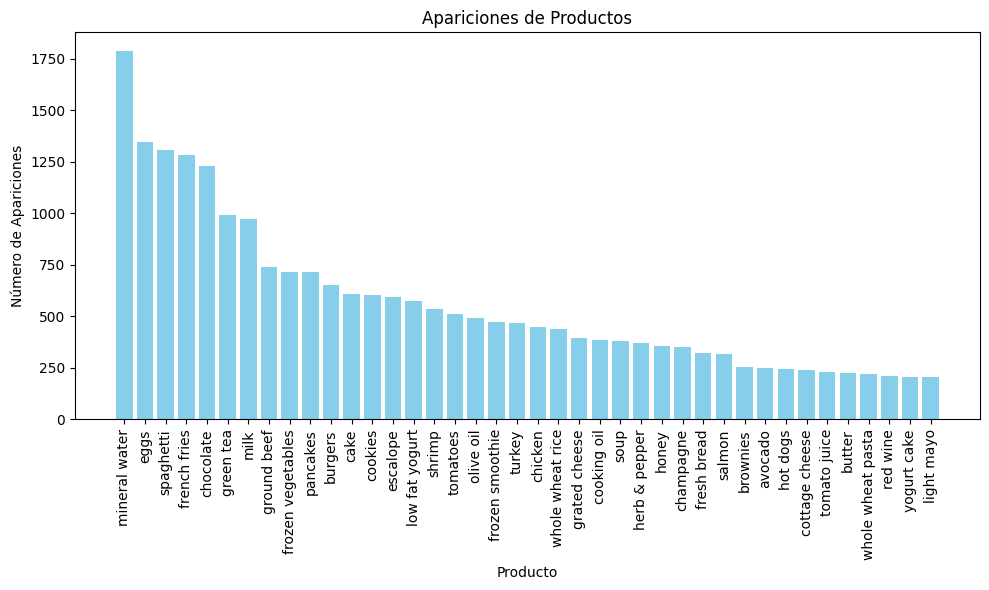

In [ ]:
import matplotlib.pyplot as plt

# Lista de nombres de productos y sus conteos
productos = [elemento[0] for elemento in lista_conteo]
conteos = [elemento[1] for elemento in lista_conteo]

# Acortamos a los 20 con más apariciones
productos = productos[0:40]
conteos = conteos[0:40]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(productos, conteos, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Producto')
plt.ylabel('Número de Apariciones')
plt.title('Apariciones de Productos')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> #### **Aplicación Minería de Datos**


Instalamos la librería **mlxtend**, que nos va a permitir trabajar con reglas de asociación

In [ ]:
pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1) **Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación. (1 punto)**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializa TransactionEncoder, transforma las compras y crea el DataFrame 'df'
# Se asume que 'compras' ya está definido como tu lista de listas de transacciones

te = TransactionEncoder()
te_ary = te.fit(compras).transform(compras)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Definir los valores de soporte para probar y almacenar los resultados
support_values = [0.01, 0.02, 0.03, 0.04, 0.05]  # Modifica esta lista según lo que quieras explorar

# Para cada valor de soporte, generar y almacenar itemsets frecuentes y reglas
for min_support in support_values:
    print(f"\n--- Soporte mínimo: {min_support} ---")
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    print(f"Itemsets frecuentes generados: {len(frequent_itemsets)}")

    if len(frequent_itemsets) > 0:
        # Mostrar itemsets frecuentes para k=1
        if min_support == 0.01:  # Ajusta esto si deseas mostrarlo para un soporte específico
            print(frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)])

        # Generar reglas de asociación
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
        print(f"Reglas generadas: {len(rules)}")
        display(rules.head())  # Utiliza print en lugar de display si no estás en Jupyter

        # Filtrar y mostrar reglas de alta confianza
        high_conf_rules = rules[rules['confidence'] >= 0.7]  # Ajusta este umbral según sea necesario
        print(f"Reglas de alta confianza: {len(high_conf_rules)}")
        display(high_conf_rules.head())  # Utiliza print en lugar de display si no estás en Jupyter


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- Soporte mínimo: 0.01 ---
Itemsets frecuentes generados: 257
     support             itemsets
0   0.020397            (almonds)
1   0.033329            (avocado)
2   0.010799     (barbecue sauce)
3   0.014265          (black tea)
4   0.011465         (body spray)
..       ...                  ...
70  0.016531         (white wine)
71  0.029463  (whole wheat pasta)
72  0.058526   (whole wheat rice)
73  0.011465               (yams)
74  0.027330        (yogurt cake)

[75 rows x 2 columns]
Reglas generadas: 162


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
2,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844,0.353384
3,(burgers),(green tea),0.087188,0.132116,0.017464,0.200306,1.516139,0.005945,1.085270,0.372947
4,(burgers),(milk),0.087188,0.129583,0.017864,0.204893,1.581175,0.006566,1.094717,0.402667


Reglas de alta confianza: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric



--- Soporte mínimo: 0.02 ---
Itemsets frecuentes generados: 103
Reglas generadas: 55


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424
1,(burgers),(french fries),0.087188,0.170911,0.021997,0.252294,1.476173,0.007096,1.108844,0.353384
2,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552,0.162275
3,(burgers),(spaghetti),0.087188,0.174110,0.021464,0.246177,1.413918,0.006283,1.095602,0.320707
4,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921,0.322617


Reglas de alta confianza: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric



--- Soporte mínimo: 0.03 ---
Itemsets frecuentes generados: 54
Reglas generadas: 27


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
2,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197


Reglas de alta confianza: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric



--- Soporte mínimo: 0.04 ---
Itemsets frecuentes generados: 35
Reglas generadas: 9


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
4,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


Reglas de alta confianza: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric



--- Soporte mínimo: 0.05 ---
Itemsets frecuentes generados: 28
Reglas generadas: 6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


Reglas de alta confianza: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric



Análisis de Soporte

En la minería de datos, especialmente en el análisis de reglas de asociación, el soporte es una medida crucial que determina la relevancia de un conjunto de ítems. Un soporte muy bajo puede generar muchas reglas, pero muchas pueden no ser útiles o significativas. Por otro lado, un soporte demasiado alto puede omitir patrones interesantes que no ocurren con tanta frecuencia.

- Con un soporte de 0.01, se generan 257 conjuntos de ítems frecuentes. Este número es relativamente alto, lo que puede incluir muchos patrones que son infrecuentes y posiblemente irrelevantes para tu análisis.

- Al aumentar el soporte a 0.02, el número de conjuntos frecuentes se reduce a 103. Esto indica una eliminación significativa de los conjuntos menos frecuentes, manteniendo aún una cantidad considerable para el análisis.

- Con un soporte de 0.03, los conjuntos de ítems frecuentes se reducen a 54. Este número representa un balance entre no ser demasiado inclusivo y aún tener suficientes ítems para encontrar patrones útiles.

- Aumentando aún más el soporte a 0.04, los conjuntos de ítems frecuentes se reducen a 35. Aquí podrías empezar a perder información importante, ya que el número de conjuntos frecuentes se reduce sustancialmente.

- Finalmente, con un soporte de 0.05, solo se generan 28 conjuntos de ítems frecuentes. Este nivel podría ser demasiado restrictivo, posiblemente omitiendo patrones importantes que no alcanzan este umbral.

Elección del Soporte Adecuado

Basándonos en estos resultados, un soporte de 0.03 parece ser una buena elección para el análisis. Proporciona un equilibrio entre eliminar los conjuntos de ítems infrecuentes y mantener suficientes conjuntos frecuentes para identificar patrones significativos. Con 54 conjuntos de ítems frecuentes, tenemos un conjunto de datos manejable que es probable que contenga patrones relevantes sin estar abrumado por la cantidad.


In [ ]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Asume que 'df' ya está definido y preparado para el análisis
min_support = 0.03  # Soporte elegido en la parte 1

# Genera conjuntos de ítems frecuentes con el soporte seleccionado
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

# Definir valores de confianza y lift para probar
confidence_values = [0.2, 0.4, 0.6]
lift_values = [1, 1.5, 2]

# Almacena resultados de reglas
rules_results = []

# Iterar sobre los valores de confianza y lift
for confidence in confidence_values:
    for lift in lift_values:
        # Genera y filtra reglas por valores de confianza y lift
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        rules_filtered = rules[rules['lift'] >= lift]

        # Almacenar resultados
        rules_results.append({
            'soporte': min_support,
            'confianza': confidence,
            'lift': lift,
            'cantidad_reglas': len(rules_filtered),
            'reglas': rules_filtered
        })

# Imprime los resultados
for result in rules_results:
    print(f"\nSoporte: {result['soporte']}, Confianza: {result['confianza']}, Lift: {result['lift']}, Reglas generadas: {result['cantidad_reglas']}")
    if result['cantidad_reglas'] > 0:
        print(result['reglas'][['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    else:
        print("No se generaron reglas con esta configuración.")

# Listar todas las reglas de alta confianza
high_conf_threshold = 0.7  # Define un umbral de alta confianza
high_conf_rules = [rule for rule in rules_results if rule['confianza'] >= high_conf_threshold]
print(f"\nReglas de alta confianza (confianza >= {high_conf_threshold}):")
for rule in high_conf_rules:
    if rule['cantidad_reglas'] > 0:
        print(rule['reglas'][['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    else:
        print("No hay reglas de alta confianza para esta configuración.")




Soporte: 0.03, Confianza: 0.2, Lift: 1, Reglas generadas: 26
            antecedents      consequents   support  confidence      lift
0           (chocolate)           (eggs)  0.033196    0.202604  1.127397
1        (french fries)      (chocolate)  0.034395    0.201248  1.228284
2           (chocolate)   (french fries)  0.034395    0.209927  1.228284
3                (milk)      (chocolate)  0.032129    0.247942  1.513276
4       (mineral water)      (chocolate)  0.052660    0.220917  1.348332
5           (chocolate)  (mineral water)  0.052660    0.321400  1.348332
6           (spaghetti)      (chocolate)  0.039195    0.225115  1.373952
7           (chocolate)      (spaghetti)  0.039195    0.239219  1.373952
8        (french fries)           (eggs)  0.036395    0.212949  1.184961
9                (eggs)   (french fries)  0.036395    0.202522  1.184961
10               (milk)           (eggs)  0.030796    0.237654  1.322437
11      (mineral water)           (eggs)  0.050927    0.213647

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Análisis de Reglas de Asociación con Soporte de 0.03

Tras fijar el soporte en 0.03, decidmos variar la confianza y el lift para ver qué tipo de reglas de asociación podía descubrir:

- Con confianza de 0.2 y lift de 1, encontré 26 reglas. Parece que hay algunas combinaciones interesantes, como chocolate y agua mineral, que aparecen juntas más a menudo de lo normal.

- Aumentando el lift a 1.5 pero manteniendo la misma confianza, las reglas bajaron a 9. Esto significa que menos combinaciones cumplen con esta relación más fuerte. Por ejemplo, las combinaciones como verduras congeladas y agua mineral se destacan, lo que tiene sentido ya que las personas que compran verduras congeladas podrían buscar también opciones saludables como el agua mineral.

- Subiendo el lift a 2, solo quedaron 2 reglas. Esto muestra que muy pocas combinaciones de productos tienen una relación tan fuerte. Pero esas reglas, especialmente las que involucran spaghetti y carne molida, parecen realmente significativas.

- Cuando aumenté la confianza a 0.4 (con un lift de 1), solo encontré 1 regla. Esto sugiere que es bastante raro que los productos se compren juntos con tanta certeza.

- Manteniendo esa misma alta confianza y aumentando el lift a 1.5, seguía teniendo 1 regla significativa: la carne molida y el agua mineral. Parece que esta es una combinación realmente fuerte en mi dataset.

- No encontré ninguna regla cuando subí más los valores, como la confianza a 0.6 o el lift a 2. Esto me dice que mis clientes no suelen comprar productos juntos con esa alta certeza y esa fuerte relación.


2) **¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos (1 punto)**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


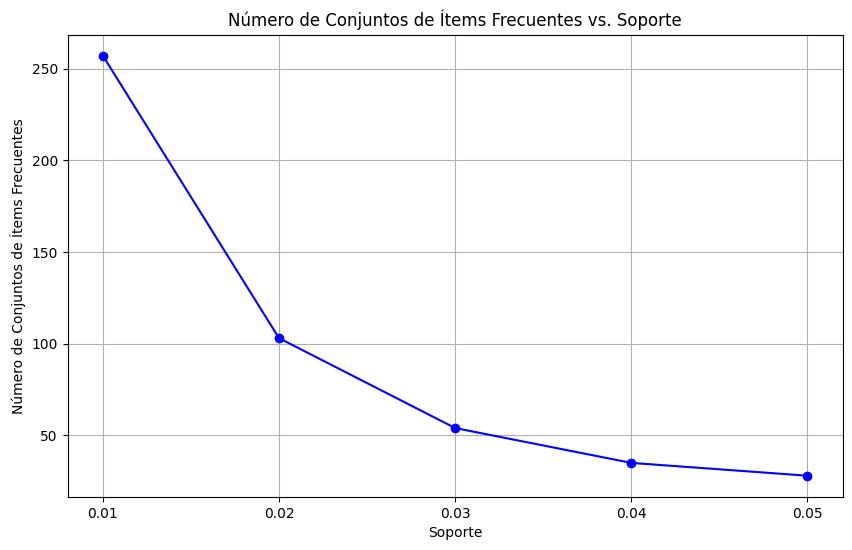

In [ ]:
import matplotlib.pyplot as plt

# Datos de soporte y la cantidad de conjuntos de ítems frecuentes generados
support_levels = [0.01, 0.02, 0.03, 0.04, 0.05]
itemsets_counts = [257, 103, 54, 35, 28]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(support_levels, itemsets_counts, marker='o', linestyle='-', color='b')

# Etiquetas y título
plt.title('Número de Conjuntos de Ítems Frecuentes vs. Soporte')
plt.xlabel('Soporte')
plt.ylabel('Número de Conjuntos de Ítems Frecuentes')
plt.grid(True)
plt.xticks(support_levels)  # Asegura que todos los niveles de soporte se muestren

# Mostrar la gráfica
plt.show()


Para ilustrar la diferencia entre soporte y frecuencia, podemos mirar los resultados de conjuntos de ítems frecuentes que generamos con diferentes niveles de soporte. Recordemos los datos:

- Soporte de 0.01: 257 conjuntos de ítems frecuentes.
- Soporte de 0.02: 103 conjuntos de ítems frecuentes.
- Soporte de 0.03: 54 conjuntos de ítems frecuentes.
- Soporte de 0.04: 35 conjuntos de ítems frecuentes.
- Soporte de 0.05: 28 conjuntos de ítems frecuentes.

Aquí, la “frecuencia” sería el número de conjuntos de ítems que aparecen más de 1%, 2%, 3%, 4%, y 5% del tiempo en todas las transacciones, respectivamente. Así, la frecuencia es un conteo directo de cuántos conjuntos de ítems alcanzan cada umbral de soporte.

El “soporte”, por otro lado, es el porcentaje de todas las transacciones que contienen un conjunto específico de ítems. Entonces, al elegir un soporte del 0.03, por ejemplo, estamos diciendo que solo nos interesan los conjuntos de ítems que aparecen en al menos el 3% de todas las transacciones.

La diferencia clave aquí es que la frecuencia nos da un número claro: cuántos conjuntos cumplen con el criterio. Pero el soporte nos da una proporción, lo que nos permite comparar la popularidad de diferentes conjuntos de ítems de manera más equitativa, especialmente cuando trabajamos con conjuntos de datos de diferentes tamaños.

3) **¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? (1 punto)**

Para poder ver mejor los resultados obtenidos con las variaciones de la configuración y el tipo de puntuación hemos decidido graficarlo, para respaldar sobre todo la respuesta a la pregunta anterior.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


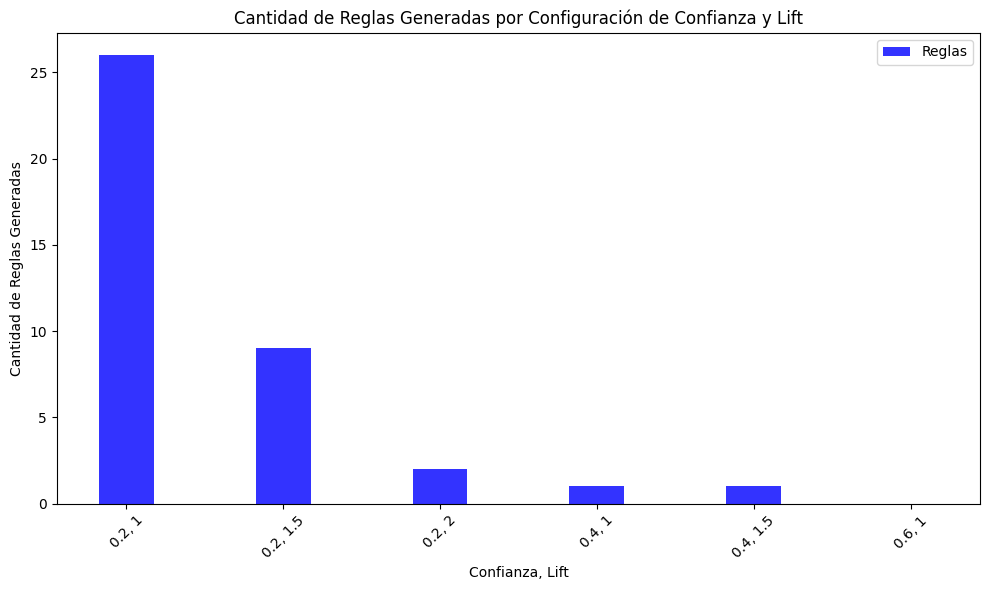

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Configuraciones de confianza y lift con las cantidades correspondientes de reglas generadas
configuraciones = ['0.2, 1', '0.2, 1.5', '0.2, 2', '0.4, 1', '0.4, 1.5', '0.6, 1']
cantidad_reglas = [26, 9, 2, 1, 1, 0]  # Asumiendo 0 para las combinaciones de confianza 0.6 y cualquier lift donde no se generaron reglas

# Configuración para la visualización de las barras
n_groups = len(configuraciones)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(index, cantidad_reglas, bar_width,
               alpha=opacity,
               color='b',
               label='Reglas')

plt.xlabel('Confianza, Lift')
plt.ylabel('Cantidad de Reglas Generadas')
plt.title('Cantidad de Reglas Generadas por Configuración de Confianza y Lift')
plt.xticks(index, configuraciones, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()



- Al pasar de confianza de 0.2 y lift de 1 (26 reglas generadas) a confianza de 0.2 y lift de 1.5 (9 reglas generadas), perdimos 17 reglas. Esto indica que esas 17 reglas tenían un lift entre 1 y 1.5, lo que significa que mientras sus antecedentes y consecuentes sí ocurren juntos más a menudo de lo esperado por pura casualidad, no son tan fuertes como para superar el umbral más alto del lift.

Esto muestra que al aumentar el lift, filtramos las reglas para dejar solo aquellas con relaciones más fuertes. Observamos que reglas como (chocolate) -> (eggs) y (chocolate) -> (french fries) quedan fuera cuando aumentamos el lift a 1.5. Esto indica que, aunque hay una relación entre estos ítems, no es lo suficientemente fuerte (no supera el lift de 1.5) para considerarse significativa. En cambio, reglas como (milk) -> (chocolate) y (ground beef) -> (mineral water) se mantienen, mostrando relaciones más sólidas entre estos productos.

- Cuando incrementamos aún más el lift a 2, manteniendo la confianza en 0.2, solo quedaron 2 reglas. Esto significa que solo dos pares de ítems tenían una relación suficientemente fuerte para cumplir con este criterio más estricto, (spaghetti) -> (ground beef) y (ground beef) -> (spaghetti). Esto demuestra que la combinación de espagueti y carne molida tiene una relación particularmente fuerte, lo suficiente como para superar un lift de 2. Esto podría indicar una tendencia de compra combinada muy específica en el conjunto de datos, como la preferencia por estos dos ítems para preparar una comida.

- Aumentando la confianza a 0.4 (con lift de 1), las reglas se redujeron a solo 1. Esto muestra que al incrementar la confianza, estamos buscando relaciones donde la presencia de un ítem (o un conjunto de ítems) prediga la presencia de otro con mayor certeza. La mayoría de las reglas anteriores no cumplían con este nivel de certeza y, por lo tanto, desaparecieron del resultado.

La drástica reducción a solo 1 regla, (ground beef) -> (mineral water), ilustra que, a medida que buscamos una mayor certeza en la relación entre los ítems (mayor confianza), muchas asociaciones previas ya no se sostienen. Esta única regla que permanece indica una predicción fuerte y confiable de que, si alguien compra carne molida, es bastante probable que también compre agua mineral.

- Aumento del Lift a 1.5 con Confianza de 0.4: La cantidad de reglas se mantiene en 1, lo que refuerza la fuerza de la relación entre ground beef y mineral water. Incluso bajo criterios más estrictos, esta asociación se mantiene, lo que destaca su relevancia.

- Umbrales Altos (Confianza 0.6, Cualquier Lift): La ausencia de reglas bajo estas condiciones sugiere que no existen relaciones dentro del conjunto de datos que cumplan simultáneamente con una alta confianza y un alto lift. Esto indica que las combinaciones de productos comprados juntos con tal nivel de certeza y fuerza son extremadamente raras o inexistentes en este conjunto de datos.


Los datos muestran que al ajustar la confianza y el lift, se filtran diferentes tipos de reglas, dejando solo aquellas que cumplen con criterios específicos de relación entre productos. Al aumentar estos valores, estamos esencialmente buscando relaciones más fuertes y más confiables, pero corremos el riesgo de perder reglas que podrían ser interesantes aunque no tan fuertes. Es un equilibrio entre calidad (relaciones fuertes) y cantidad (número de reglas descubiertas).



4) **Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.
(1 punto)**

In [ ]:
# Configuración 1: Usando confianza con un umbral mínimo de 0.2 y filtrando por lift >= 1.5
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules_confidence_filtered = rules_confidence[rules_confidence['lift'] >= 1.5]

# Configuración 2: Usando lift con un umbral mínimo de 2
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=2)

# Imprime las primeras 5 reglas de cada configuración para revisión
print("Reglas filtradas por confianza (min_threshold=0.2) y lift >= 1.5:")
print(rules_confidence_filtered.head())

print("\nReglas filtradas por lift (min_threshold=2):")
print(rules_lift.head())

Reglas filtradas por confianza (min_threshold=0.2) y lift >= 1.5:
            antecedents      consequents  antecedent support  \
3                (milk)      (chocolate)            0.129583   
15  (frozen vegetables)  (mineral water)            0.095321   
17        (ground beef)  (mineral water)            0.098254   
18        (ground beef)      (spaghetti)            0.098254   
19          (spaghetti)    (ground beef)            0.174110   

    consequent support   support  confidence      lift  leverage  conviction  \
3             0.163845  0.032129    0.247942  1.513276  0.010898    1.111823   
15            0.238368  0.035729    0.374825  1.572463  0.013007    1.218270   
17            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401   
18            0.174110  0.039195    0.398915  2.291162  0.022088    1.373997   
19            0.098254  0.039195    0.225115  2.291162  0.022088    1.163716   

    zhangs_metric  
3        0.389677  
15       0.402413  
17      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Para el análisis, digamos que nos enfocamos en las reglas obtenidas con la configuración inicial (confianza de 0.2 y lift de 1.5) y encontramos la regla (milk) -> (chocolate) particularmente interesante.


La regla (milk) -> (chocolate) con un soporte de 0.032129, una confianza de 0.247942, y un lift de 1.513276 nos llamó la atención.

Esto sugiere que, en el 3.21% de las transacciones, la gente compra leche y chocolate juntos, lo cual es interesante. La confianza significa que casi el 25% de las veces que alguien compra leche, también compra chocolate. El lift mayor a 1 indica que estos dos productos se compran juntos más frecuentemente de lo que cabría esperar si fueran independientes.

Este patrón podría indicar una tendencia entre los consumidores a disfrutar de estos dos ítems juntos, posiblemente debido a su uso combinado en recetas o simplemente como un emparejamiento de snacks. Esta información podría ser útil para promociones cruzadas o para ubicar estos productos más cerca uno del otro en las tiendas.

Ajustar los parámetros de metric y min_threshold nos permite respaldar nuestro análisis de reglas de asociación, ayudándonos a descubrir patrones de compra más fuertes y confiables entre los ítems.

Al interpretar las reglas específicas que encontramos interesantes, podemos obtener insights valiosos sobre el comportamiento de compra, que pueden ser aplicados en estrategias de marketing, disposición de productos en tiendas, o incluso para guiar el desarrollo de nuevos productos.

5) **Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes del supermercado?**

Vamos a representar gráficamente, las reglas que hemos obtenido en nuestras dos mejores configuraciones. Para ellos utilizaremos un diagrama de red o grafo:



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


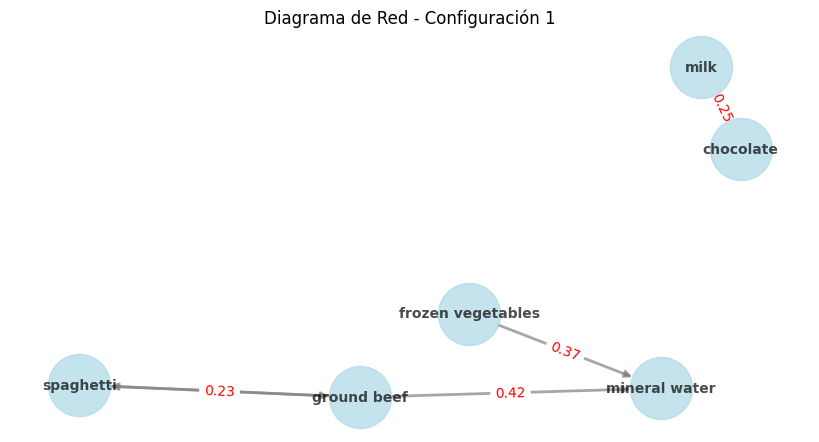

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


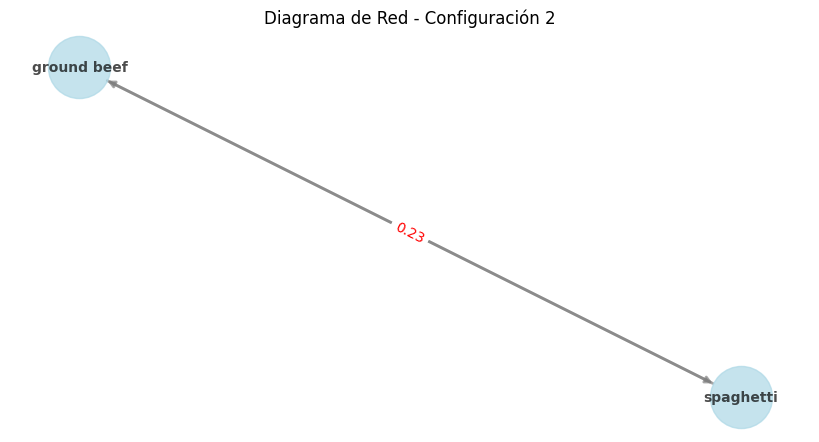

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_association_rules(rules, title):
    G = nx.DiGraph()

    # Añadimos nodos y aristas
    for idx, row in rules.iterrows():
        antecedents = ', '.join(row['antecedents'])
        consequents = ', '.join(row['consequents'])
        G.add_edge(antecedents, consequents, weight=row['confidence'])

    # Dibujamos el grafo
    plt.figure(figsize=(8, 4))
    pos = nx.spring_layout(G)  # Layout para distribuir los nodos
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2, alpha=0.7)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}, font_color='red')
    plt.title(title)
    plt.show()

# Grafo para la configuración 1: Reglas filtradas por confianza (min_threshold=0.2) y lift >= 1.5
plot_association_rules(rules_confidence_filtered.head(), "Diagrama de Red - Configuración 1")

# Grafo para la configuración 2: Reglas filtradas por lift (min_threshold=2)
plot_association_rules(rules_lift.head(), "Diagrama de Red - Configuración 2")


Una vez observadas las reglas de nuestras dos mejores configuraciones, podemos ver que sí hay dos reglas que se repiten, que son:

si (ground beef) ---> (spaguetti)

si (spaguetti) ---> (ground beef)

Como vemos, existe una fuerte asociación entre "ground beef" y "spaguetti" que se repite en ambas configuraciones.

Esto nos permite asegurar que estas asociaciones son consistentes y sólidas en el **comportamiento de los clientes** en el supermercado. Es decir, podemos afirmar que los clientes que compran carne y spaguetti juntos (39 %)

Además sabemos que el 40% de las veces que se compra ground beef, también se compran spaguetti, y un 23% de las veces que se compra spaguetti, también se compra gorund beef.

Esto puede ser útil para los comerciantes al planificar estrategias de disposición de productos y promociones para maximizar las ventas y la satisfacción del cliente, ya que con estos datos, podemos entender la disposición cercana de la carne picada, y los spaguettis.

Además, observando la configuración 1 elegida, podemos concluir otro comportamiento habitual de los clientes cuando van al supermercado:

Un 40 % de las veces que un cliente decide comprar carne picada en el supermercado, también opta por llevarse agua mineral. Es un comportamiento algo más dificil de explicar (pues spaguetti y carne picada es una receta muy habitual, por lo que es muy lógico que ambos se incluyan en una misma compra)

**Cómo se comportan los clientes en el supermercado**

Como hemos podido observar tras el estudio y análisis de este DataBase, formado por tickets de compra, aunque no siempre, hay ocasiones en que los clientes de un supermercado añaden un producto a su cesta en función de otros que ya añadieron.

El principal motivo que podemos detectar con nuestros resultados, es que estas asociaciones se deben a la creación de rectas comunes y culinarias, en las que son necesarios varios ingredientes.

Otro motivo, que se podría detectar, es por cercanía de los productos en la disposición del supermercado (lo que podría explicar la regla carne --> agua mineral, pues ambos podrían estar en la zona de refrigeración), aunque para ello necesitaríamos conocer como están colocados los productos de forma concreta.

Además de estos motivos, existen otras preferencias personales, dificiles de conocer.

Es interesante que los comerciantes aprovechen estos patrones al analizar la cercanía y disposición de productos, buscando aumentar sus ventas.

> ## **Práctica 2 (Patrones Secuenciales)**




## **Trabajo de la base de datos:**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Especifica la ruta del archivo CSV en Google Drive
ruta_archivo_drive = '/content/drive/MyDrive/Online Retail.xlsx'

# Carga el archivo CSV en un DataFrame de pandas
dataRetail = pd.read_excel( ruta_archivo_drive )

# Muestra las primeras filas del DataFrame para verificar que los datos se hayan cargado correctamente
print(dataRetail.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


Imprimimos el nombre de las columnas

In [7]:
print(dataRetail.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


 ### **Análisis de valores NaN:**

In [8]:
dataRetail.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

Observamos que solo existen valores NaN en la variable *Description*, por lo que por ahora no vamos a hacer nada con ellos debido a que no nos afecta en cuanto al trabajo que vamos a llevar a cabo.

 ### **Análisis estadístico de las variables importantes:**

A continuación vamos a realizar un análisis más profundo de dos varibales: *UnitPrice* y *Quantity*. *UnitPrice* representa el "Precio por unidad" de los productos y *Quantity* la "Cantidad" que se ha comprado del artículo Utilizaremos gráficos de caja (box plots) para representar la distribución y la variabilidad de estas dos variables en nuestro conjunto de datos.

Hemos elegido estas dos variables ya que son indicadores clave del comportamiento de compra de los clientes y pueden proporcionar información valiosa para la toma de decisiones estratégicas.

El gráfico de caja nos permitirá visualizar de manera efectiva la distribución de estos dos aspectos. En particular, podremos identificar la presencia de valores atípicos, la dispersión de los datos y la presencia de sesgos en la distribución.


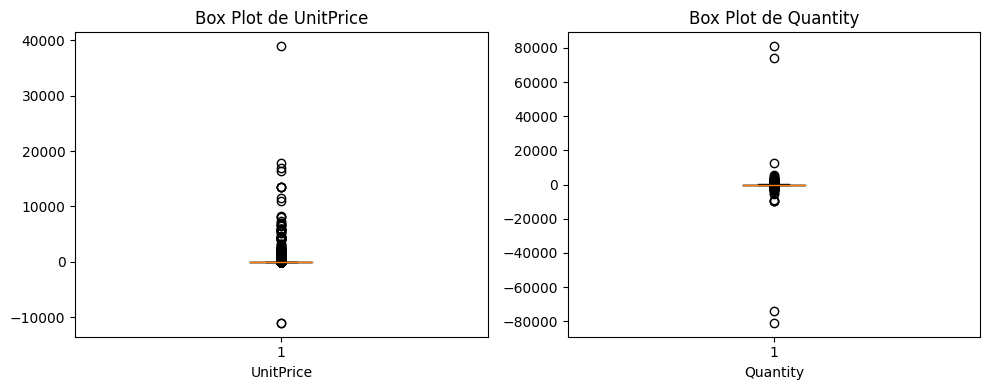

In [9]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
plt.figure(figsize=(10, 4))

# Box plot de UnitPrice
plt.subplot(1, 2, 1)
plt.boxplot(dataRetail['UnitPrice'])
plt.title('Box Plot de UnitPrice')
plt.xlabel('UnitPrice')

# Box plot de Quantity
plt.subplot(1, 2, 2)
plt.boxplot(dataRetail['Quantity'])
plt.title('Box Plot de Quantity')
plt.xlabel('Quantity')

# Ajustar el diseño de los subplots para evitar solapamiento
plt.tight_layout()

# Mostrar los box plots
plt.show()


Tanto para el valor del "Precio" como el de "Cantidad" no nos intersa quedarnos con valores negativos ni con valores 0. Debido a que van a ser errores en la base de datos.


In [10]:
dataRetail = dataRetail.loc[dataRetail['UnitPrice'] > 0]
dataRetail = dataRetail.loc[dataRetail['Quantity']  > 0]

**Análisis de Outlayers:**

A continuación analizaremos los cuartiles de las variables en el conjunto de datos. Donde:
* Q1 será el primer cuartil (25º percentil)
* Q2 será el segundo cuartil (50º percentil o mediana)
* Q3 será el tercer cuartil (75º percentil)

In [11]:
q1 = []
q2 = []
q3 = []

# Recorremos cada variable
for variable in (['UnitPrice', 'Quantity']):
    q1.append(dataRetail[variable].quantile(0.25))
    q2.append(dataRetail[variable].quantile(0.50))
    q3.append(dataRetail[variable].quantile(0.75))  # Calculamos el tercer cuartil también

variables = ['UnitPrice', 'Quantity']

# Mostramos los cuartiles
print("\nCUARTILES")
print("Variable\tQ1\tQ2\tQ3")

for i, variable in enumerate(variables):
    print(f"{variable}\t{q1[i]}\t{q2[i]}\t{q3[i]}")



CUARTILES
Variable	Q1	Q2	Q3
UnitPrice	1.25	2.08	4.13
Quantity	1.0	3.0	10.0


El siguiente paso será obtener el **IQR** de cada una, es decir la difernecia entre el 3º y 1º cuartil, y que representa el rango en el que se encuentran el 50% de los valores

In [12]:
IQR = []
for i, variable in enumerate(['UnitPrice', 'Quantity']):
    IQR.append(q3[i]-q1[i])

# Mostramos los valores de IQR para cada variable
print("\n")
print("IQR")
print("Variable\tIQR")
for variable, iqr in zip(variables, IQR):
    print(f"{variable}\t{iqr}")



IQR
Variable	IQR
UnitPrice	2.88
Quantity	9.0


Obtenemos los **outliers**, estudiando su posición frente a los límites superior e inferior, que delimitan el rango de valores típicos:

In [13]:
# Calculamos los LÍMITES, SUPERIOR E INFERIORR:
limite_superior = []
limite_inferior = []

for i, variable in enumerate(['UnitPrice', 'Quantity']):
    limite_inferior.append(q1[i] - 1.5 * IQR[i])
    limite_superior.append(q3[i] + 1.5 * IQR[i])


# Finalmente, una vez tenemos los limites, calculamos los OUTLIERS:
outliers_UnitPrice = dataRetail[(dataRetail['UnitPrice'] < limite_inferior[0]) | (dataRetail['UnitPrice'] > limite_superior[0])]['UnitPrice']
outliers_Quantity = dataRetail[(dataRetail['Quantity'] < limite_inferior[1]) | (dataRetail['Quantity'] > limite_superior[1])]['Quantity']


# Mostramos por pantalla los outliers
print("\n")
print("OUTLIERS")
print("Variable\tOutliers")
print("UnitPrice\t" + ", ".join(map(str, outliers_UnitPrice.unique())))
print("Quantity\t" + ", ".join(map(str, outliers_Quantity.unique())))

print(len(outliers_UnitPrice))
print(len(outliers_Quantity))



OUTLIERS
Variable	Outliers
UnitPrice	9.95, 18.0, 10.95, 14.95, 16.95, 12.75, 19.95, 8.5, 165.0, 35.75, 10.65, 15.0, 18.95, 8.95, 50.0, 16.98, 11.02, 8.47, 12.72, 10.17, 20.38, 11.87, 25.49, 51.02, 9.32, 34.0, 16.13, 21.23, 18.68, 14.43, 569.77, 13.57, 29.95, 59.53, 15.28, 19.53, 8.49, 9.34, 607.49, 10.75, 24.95, 79.95, 11.95, 295.0, 40.0, 29.79, 254.43, 121.06, 498.47, 887.52, 28.0, 42.95, 26.95, 21.95, 49.95, 76.55, 10.62, 863.74, 39.96, 11.05, 940.87, 15.95, 35.0, 9.77, 950.99, 924.59, 13541.33, 836.14, 229.74, 448.0, 593.15, 607.96, 39.95, 19.84, 9.89, 52.77, 32.69, 701.95, 10.19, 729.42, 145.0, 19.94, 885.94, 35.95, 547.32, 620.68, 822.94, 85.79, 847.42, 10.0, 907.47, 175.0, 641.86, 11.9, 584.59, 125.0, 20.0, 113.45, 198.17, 34.04, 340.72, 146.85, 34.95, 65.0, 510.79, 565.37, 10.85, 803.55, 662.14, 10.2, 603.62, 396.81, 350.78, 250.83, 22.0, 150.0, 182.37, 112.37, 164.55, 337.23, 514.0, 549.79, 324.43, 311.66, 128.6, 114.34, 103.57, 189.57, 152.68, 50.6, 50.64, 29.53, 1298.4, 38.

Finalmente, eliminamos los outliers para obtener conclusiones más precisas y confiables del análisis de datos.

In [14]:
# Filtramos la base de datos para eliminar los outliers
dataRetailTrabajo = dataRetail.copy()  # Copiamos la base de datos para no modificar la original
for i, variable in enumerate(['UnitPrice', 'Quantity']):
    dataRetailTrabajo = dataRetailTrabajo[(dataRetailTrabajo[variable] >= limite_inferior[i]) & (dataRetailTrabajo[variable] <= limite_superior[i])]

print(len(dataRetail))
print(len(dataRetailTrabajo))

530104
436166


**Eliminamos datos no validos**

Eliminamos aquellos datos como 'POST' de nuestros datos.

In [15]:
def datos_validos(code):

    code = str(code)
    # Verificamos si el StockCode tiene exactamente 5 dígitos o 5 dígitos seguidos de una letra
    return len(code) == 5 and code.isdigit() or (len(code) == 6 and code[:5].isdigit() and code[5].isalpha())


dataRetailTrabajo = dataRetailTrabajo[dataRetailTrabajo['StockCode'].apply(datos_validos)]

## **Lista de secuencias**

Para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes, filtraremos las
filas de *dataRetail* para eliminar registros con cantidades muy bajas, que podrían ser errores o transacciones no representativas.
Después, vamos a agrupar los datos por 'CustomerID' (identificador de cliente) y creamos listas que representan las secuencias de compras de cada cliente y filtramos las sublistas que contienen más de un elemento


In [16]:
dataRetail_Prueba  = dataRetailTrabajo.copy()
print(len(dataRetail_Prueba))

# Agrupar los datos por 'InvoiceNo' y crear listas de 'StockCode' correspondientes a cada grupo
secuencias_Prueba = dataRetail_Prueba.groupby('CustomerID')['InvoiceNo'].agg(list).tolist()

# Convertir la lista de listas a una lista de strings
secuencias_Prueba = [[str(elemento) for elemento in secuencia] for secuencia in secuencias_Prueba]

# Filtrar las sublistas que contienen más de un elemento
secuencias_Prueba = [secuencia for secuencia in secuencias_Prueba if len(secuencia) > 1]

# Mostrar las primeras secuencias como ejemplo
print(secuencias_Prueba[:10])

print(len(secuencias_Prueba))

435647
[['537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '537626', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '542237', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '549222', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '556201', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '562032', '

In [17]:
# Convertir los datos de CustomerID a strings
dataRetail['CustomerID'] = dataRetail['CustomerID'].astype(str)
dataRetail['InvoiceNo'] = dataRetail['InvoiceNo'].astype(str)
dataRetail['StockCode'] = dataRetail['StockCode'].astype(str)

dataRetail_Prueba  = dataRetailTrabajo.copy()

# Agrupar los datos por CustomerID e InvoiceNo y crear listas de StockCode correspondientes a cada grupo
grouped_data = dataRetail_Prueba.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].agg(list)

# Crear un diccionario para almacenar las transacciones agrupadas por CustomerID
transactions = {}

# Iterar sobre los grupos y agregar las transacciones al diccionario
for (customer_id, invoice_no), stock_codes in grouped_data.items():
    if customer_id not in transactions:
        transactions[customer_id] = []
    transactions[customer_id].append(stock_codes)

# Convertir el diccionario a una lista de listas de listas
transactions_list = [[invoice_data for invoice_data in transactions[customer_id]] for customer_id in transactions]

# Imprimir la lista de listas de listas
print(transactions_list[:10])
print(len(transactions_list))


[[[85116, 22375, 71477, 22771, 22772, 22773, 22774, 22775, 22805, 22725, 22726, 22727, 22728, 22729, 22212, 21171, 22195, 84969, '84997C', '84997B', '84997D', 22494, 22497, '85232D', 21064, 21731, 20780, 20782], [85116, 20719, 22375, 22376, 20966, 22725, 22726, 22727, 22728, 22729, 22196, '47559B', 21154, 21041, 21035, 84969, 22134, 21832, 22422, 22497, 21731, '84558A'], [22376, 22374, 22371, 22375, 20665, 21791, 22550, 23177, 22432, 22774, 22195, 22196, 21041, 22699, 21731, '84559A', '84559B', 22821, 22497], [23084, 23162, 23171, 23172, 23170, 23174, 23175, 22371, 22375, 85178, 23146, '84558A', '51014C', 22727, 22725], [23297, 22375, 22374, 22376, 22371, 22372, 21578, 20719, 22727, 23146, 23147, '47559B', 23175, 22992, 23316], [23480, 21265, 21636, 22372, 22375, 22371, 22374, 22252, 22945, 47580, '47567B', '47559B', 22698, 22697, 21731, 23177, 21791, 23508, 23506, 23503, 22992, 22561, 22621, 23146, 23421, 23422, 23420, 22699, 22725, 22728, 22726, 22727, 20719, 23162, 22131], [23497, 2

 ### **GSP (Generalized Sequential Patterns):**

El algoritmo GSP (Generalized Sequential Patterns) es un algoritmo de minería de patrones secuenciales utilizado para descubrir secuencias frecuentes dentro de un conjunto de datos secuenciales. Este algoritmo es especialmente útil para analizar datos que tienen una estructura de secuencia, como transacciones de compra, registros de actividad de usuarios o secuencias de eventos temporales.

Si hablamos de su funcionamiento podemos decir que el algoritmo comienza encontrando todas las secuencias frecuentes de un solo elemento. Luego, para k mayor o igual a 2, genera secuencias candidatas de k elementos a partir de las secuencias frecuentes de k-1 elementos. Estas secuencias candidatas se podan para eliminar aquellas que contienen alguna secuencia de k-1 elementos que no es frecuente. Luego, se recorre nuevamente el conjunto de datos para obtener el soporte de las secuencias candidatas, y se eliminan aquellas cuyo soporte real esté por debajo de un umbral mínimo de soporte (MinSupp).

**GSP en Phyton**

La implementación en Python, conocida como GSP-python, proporciona una forma conveniente de aplicar el algoritmo GSP a conjuntos de datos en Python. Esta implementación incluye parámetros para ajustar las restricciones de tiempo, como mingap, maxgap y maxspan, lo que permite adaptar el algoritmo a diferentes contextos y requisitos específicos de aplicación.

Además del algoritmo GSP, el proyecto también incluye un generador de conjuntos de datos simples, que puede ser útil para probar y experimentar con el algoritmo en conjuntos de datos de ejemplo.

In [18]:
! pip install gsp_python

Antes de aplicar GSP tenemos que tener en cuenta que este algoritmo espera que los elementos de nuestras transacciones sean del mismo tipo, pues lo que hace es comparar los datos, por lo que no puede comparar tipos de datos incompatibles.

En nuestra `transactions_list` todos nuestros datos deberían ser numeros de 5 cifras, sin embargo, nos podemos encontrar unos datos que constan de un numero de 5 cifras seguido de una letra.

Antes de aplicar el GSP debemos asegurarnos de solucionar este problema y hacer que todos nuestros datos tengan el mismo formato.

In [19]:
# Definir la función para cambiar letras por números
def sustituir(cadena):
    if isinstance(cadena, int):
        cadena = str(cadena)

    if len(cadena) == 6 and cadena[-1].isalpha():
        letter_to_number = {letter: str(index) for index, letter in enumerate('abcdefghijklmnopqrstuvwxyz', start=1)}
        if cadena[-1].lower() in letter_to_number:
            cadena = cadena[:-1] + letter_to_number[cadena[-1].lower()]

    return cadena

# Aplicar la función a tus datos
for customer_transactions in transactions_list:
    for transaction in customer_transactions:
        for i, item in enumerate(transaction):
                transaction[i] = sustituir(item)

# Verificar los datos modificados
print(transactions_list[:10])
print(len(transactions_list))


[[['85116', '22375', '71477', '22771', '22772', '22773', '22774', '22775', '22805', '22725', '22726', '22727', '22728', '22729', '22212', '21171', '22195', '84969', '849973', '849972', '849974', '22494', '22497', '852324', '21064', '21731', '20780', '20782'], ['85116', '20719', '22375', '22376', '20966', '22725', '22726', '22727', '22728', '22729', '22196', '475592', '21154', '21041', '21035', '84969', '22134', '21832', '22422', '22497', '21731', '845581'], ['22376', '22374', '22371', '22375', '20665', '21791', '22550', '23177', '22432', '22774', '22195', '22196', '21041', '22699', '21731', '845591', '845592', '22821', '22497'], ['23084', '23162', '23171', '23172', '23170', '23174', '23175', '22371', '22375', '85178', '23146', '845581', '510143', '22727', '22725'], ['23297', '22375', '22374', '22376', '22371', '22372', '21578', '20719', '22727', '23146', '23147', '475592', '23175', '22992', '23316'], ['23480', '21265', '21636', '22372', '22375', '22371', '22374', '22252', '22945', '475

 Implementamos del algoritmo GSP

In [20]:
from gsp_python.gsp import GSP

# Configurar y ejecutar el algoritmo GSP
gsp = GSP(transactions_list, minsup=0.03)  # Ajusta el umbral de soporte mínimo según tus necesidades
frequent_patterns = gsp.run_gsp()

# Imprimir los patrones secuenciales frecuentes con soporte alineado y en negrita
for pattern, support in frequent_patterns:
    print(f"\033[1mPatrón:\033[0m {pattern}, \033[1mSoporte:\033[0m {support}")


Patrón: [['71477']], Soporte: 129
Patrón: [['22771']], Soporte: 148
Patrón: [['22725']], Soporte: 168
Patrón: [['22726']], Soporte: 320
Patrón: [['22727']], Soporte: 381
Patrón: [['22728']], Soporte: 285
Patrón: [['22729']], Soporte: 178
Patrón: [['22212']], Soporte: 142
Patrón: [['22195']], Soporte: 141
Patrón: [['849973']], Soporte: 193
Patrón: [['849972']], Soporte: 191
Patrón: [['849974']], Soporte: 235
Patrón: [['21731']], Soporte: 242
Patrón: [['20719']], Soporte: 229
Patrón: [['22196']], Soporte: 134
Patrón: [['475592']], Soporte: 148
Patrón: [['21154']], Soporte: 167
Patrón: [['21035']], Soporte: 145
Patrón: [['22371']], Soporte: 144
Patrón: [['21791']], Soporte: 315
Patrón: [['22550']], Soporte: 133
Patrón: [['23177']], Soporte: 173
Patrón: [['22432']], Soporte: 155
Patrón: [['22699']], Soporte: 388
Patrón: [['23084']], Soporte: 388
Patrón: [['23171']], Soporte: 172
Patrón: [['23172']], Soporte: 140
Patrón: [['23170']], Soporte: 200
Patrón: [['23174']], Soporte: 179
Patrón: [[

Las reglas de asociación son una forma de descubrir relaciones entre los elementos de un conjunto de datos transaccionales. A continuacion, implementaremos funciones para generar dichas reglas

In [21]:
from itertools import combinations

def generate_association_rules(frequent_patterns, minconf):
    # Inicializar la lista de reglas de asociación
    association_rules = []

    # Generar todas las reglas de asociación
    for pattern, support in frequent_patterns:
        if len(pattern) < 2:
            continue  # Ignorar patrones con menos de 2 elementos

        # Generar todos los subconjuntos del patrón
        subsets = get_subsets(pattern)

        # Iterar sobre los subconjuntos (posibles antecedentes)
        for antecedent in subsets:
            antecedent_tuple = tuple(antecedent)  # Convertir el subconjunto en una tupla
            antecedent_support = find_support(frequent_patterns, antecedent)  # Calcular el soporte del antecedente

            # Verificar si el soporte del antecedente es cero
            if antecedent_support == 0:
                continue  # Saltar esta iteración si el soporte del antecedente es cero

            # El soporte de la regla es el soporte del patrón completo
            rule_support = support

            # Calcular la confianza de la regla
            confidence = rule_support / antecedent_support

            # Comprobar si la confianza supera el umbral mínimo
            if confidence >= minconf:
                # Convertir cada elemento de pattern en una tupla
                pattern_tuple = tuple(str(item) for item in pattern)


                # Convertir la lista de tuplas en un conjunto
                pattern_set = set(pattern_tuple)

                # Calcular el consecuente de la regla de asociación
                consequent_set = pattern_set - {tuple(str(item) for item in antecedent_tuple)}


                # Convertir el conjunto de consecuente de regla de asociación en una tupla
                consequent = tuple(consequent_set)

                association_rules.append((antecedent, consequent, rule_support, confidence))

    # Devolver la lista de reglas generadas
    return association_rules



def get_subsets(seq):
    """Genera todos los subconjuntos posibles de una secuencia 'seq'."""
    subsets = []
    for i in range(1, len(seq) + 1):
        subsets.extend(combinations(seq, i))
    return [tuple(subset) for subset in subsets]  # Convertir cada subconjunto a una tupla


def find_support(frequent_patterns, pattern):
    """Encuentra el soporte para el patrón dado dentro de la lista de patrones frecuentes."""
    for pat, support in frequent_patterns:
        if set(tuple(item) for item in pattern).issubset(set(tuple(item) for item in pat)):
            return support
    return 0



minconf = 0.5
rules = generate_association_rules(frequent_patterns, minconf)
# Imprimir las reglas de asociación
for i, (antecedent, pattern, rule_support, confidence) in enumerate(rules, 1):
    antecedent_str = ', '.join(str(item) for item in antecedent)
    pattern_str = ', '.join(str(item) for item in pattern)
    print(f"\033[1mRegla {i}:\033[0m {antecedent_str} → {pattern_str}, \033[1mSoporte:\033[0m {rule_support:<5}, \033[1mConfianza:\033[0m {confidence:.2f}")

Regla 1: ['22726'], ['22727'] → ['22727'], ['22726'], Soporte: 158  , Confianza: 1.00
Regla 2: ['22726'] → ['22727'], ['22726'], Soporte: 163  , Confianza: 0.51
Regla 3: ['22727'], ['22726'] → ['22727'], ['22726'], Soporte: 163  , Confianza: 1.03
Regla 4: ['22727'], ['22728'] → ['22727'], ['22728'], Soporte: 135  , Confianza: 1.00
Regla 5: ['22728'], ['22726'] → ['22726'], ['22728'], Soporte: 129  , Confianza: 1.00
Regla 6: ['22728'], ['22727'] → ['22727'], ['22728'], Soporte: 142  , Confianza: 1.05
Regla 7: ['22666'], ['22720'] → ['22666'], ['22720'], Soporte: 138  , Confianza: 1.00
Regla 8: ['22720'], ['22722'] → ['22720'], ['22722'], Soporte: 132  , Confianza: 1.00
Regla 9: ['22720'], ['23245'] → ['23245'], ['22720'], Soporte: 149  , Confianza: 1.00
Regla 10: ['22720'], ['23298'] → ['22720'], ['23298'], Soporte: 134  , Confianza: 1.00
Regla 11: ['22720'], ['23243'] → ['23243'], ['22720'], Soporte: 130  , Confianza: 1.00
Regla 12: ['22722'], ['22720'] → ['22720'], ['22722'], Soporte:

Ahora cambiamos los códigos por los nombres de los productos

In [22]:
def deshacer_sustitucion(cadena):
    if isinstance(cadena, int):
        cadena = str(cadena)

    if len(cadena) == 5 and cadena[-1].isdigit():
        number_to_letter = {str(index): letter for index, letter in enumerate('abcdefghijklmnopqrstuvwxyz', start=1)}
        if cadena[-1] in number_to_letter:
            cadena = cadena[:-1] + number_to_letter[cadena[-1]]

    return cadena

# Aplicar la función a tus datos
for customer_transactions in transactions_list:
    for transaction in customer_transactions:
        for i, item in enumerate(transaction):
            transaction[i] = deshacer_sustitucion(item)

# Verificar los datos modificados
print(transactions_list[:10])
print(len(transactions_list))


[[['8511f', '2237e', '7147g', '2277a', '2277b', '2277c', '2277d', '2277e', '2280e', '2272e', '2272f', '2272g', '2272h', '2272i', '2221b', '2117a', '2219e', '8496i', '849973', '849972', '849974', '2249d', '2249g', '852324', '2106d', '2173a', '20780', '2078b'], ['8511f', '2071i', '2237e', '2237f', '2096f', '2272e', '2272f', '2272g', '2272h', '2272i', '2219f', '475592', '2115d', '2104a', '2103e', '8496i', '2213d', '2183b', '2242b', '2249g', '2173a', '845581'], ['2237f', '2237d', '2237a', '2237e', '2066e', '2179a', '22550', '2317g', '2243b', '2277d', '2219e', '2219f', '2104a', '2269i', '2173a', '845591', '845592', '2282a', '2249g'], ['2308d', '2316b', '2317a', '2317b', '23170', '2317d', '2317e', '2237a', '2237e', '8517h', '2314f', '845581', '510143', '2272g', '2272e'], ['2329g', '2237e', '2237d', '2237f', '2237a', '2237b', '2157h', '2071i', '2272g', '2314f', '2314g', '475592', '2317e', '2299b', '2331f'], ['23480', '2126e', '2163f', '2237b', '2237e', '2237a', '2237d', '2225b', '2294e', '475

In [23]:
def nombresReglas(dataRetail, rules):
    # Crear el diccionario de mapeo
    product_mapping = dict(zip(dataRetail['StockCode'], dataRetail['Description']))

    # Imprimir las reglas de asociación con los nombres de los productos
    for i, (antecedent, pattern, rule_support, confidence) in enumerate(rules, 1):
        antecedent_names = [product_mapping.get(str(code).replace("[", "").replace("]", "").replace("'", "").replace('"', ''), 'No encontrado') for code in antecedent]
        pattern_names = [product_mapping.get(str(code).replace("[", "").replace("]", "").replace("'", "").replace('"', ''), 'No encontrado') for code in pattern]
        antecedent_str = ', '.join(antecedent_names)
        pattern_str = ', '.join(pattern_names)
        print(f"\033[1mRegla {i}:\033[0m {antecedent_str} -> {pattern_str}, \033[1m\033[91mSoporte:\033[0m {rule_support:<5}, \033[1m\033[94mConfianza:\033[0m {confidence:<5.2f}")


nombresReglas(dataRetail, rules)

Regla 1: ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED  -> ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN, Soporte: 158  , Confianza: 1.00 
Regla 2: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN, Soporte: 163  , Confianza: 0.51 
Regla 3: ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN, Soporte: 163  , Confianza: 1.03 
Regla 4: ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE PINK -> ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE PINK, Soporte: 135  , Confianza: 1.00 
Regla 5: ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE PINK, Soporte: 129  , Confianza: 1.00 
Regla 6: ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE RED  -> ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE PINK, Soporte: 142  , Confianza: 1.05 
Regla 7: RECIPE BOX PANTRY YELLOW DESIGN, SET OF 3 CAKE TINS PANTRY DESIGN  -> RECIPE BOX PANTRY YELLOW DES

Ahora probaremos con otra configuración de soporte

In [24]:
gsp2 = GSP(transactions_list, minsup=0.05)
frequent_patterns2 = gsp2.run_gsp()

In [25]:
minconf2 = 0.7
rules2 = generate_association_rules(frequent_patterns2, minconf2)
# Imprimir las reglas de asociación
print("\033[36mCASO 2:\033[0m")
print("")
nombresReglas(dataRetail, rules2)


CASO 2:

Regla 1: No encontrado, No encontrado -> No encontrado, No encontrado, Soporte: 214  , Confianza: 1.00 
